## Predictiong Heart-Disease using ML

Using python-based Machine Learning and Data science tools from their medical attributes

Approach :-

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Data
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Evaluation
> 95% sccuracy

## Features

Create data dictionary

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems
signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during * * * * excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Scikit-Learn version 1.2+, plot_roc_curve is now RocCurveDisplay**

In [1]:
# Tools

# EDA & plotting
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data 

In [2]:
df = pd.read_csv("Data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # rows, colums

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Exploration (EDA : Exploratory data analysis)
Get to kow ablout the data and become a subject matter expert on datasets

* questions?
* types and treatment methods of data
*  Dealing with missing Data
*  Outliers
*  Manpulate data to get best!

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# (0,1) = (True, False)
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

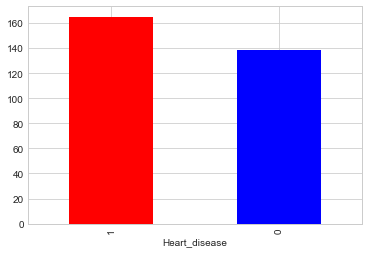

In [7]:
df.target.value_counts().plot(kind = "bar", color= ["Red", "Blue"], xlabel="Heart_disease");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# missing value check
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Comparing  Columns : Find Pattern


In [11]:
df.sex.value_counts()

# (0,1) = (women, men)

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Comapring sex with target using `crossbar`

pd.crosstab(df.target, df.sex)

# 72 out of 96 womens have Heart disease ~75%
# 93 out of 207 mens have Heart disease ~45%

# ==> 60% of patients have Heart-Disease

sex,0,1
target,,
0,24,114
1,72,93


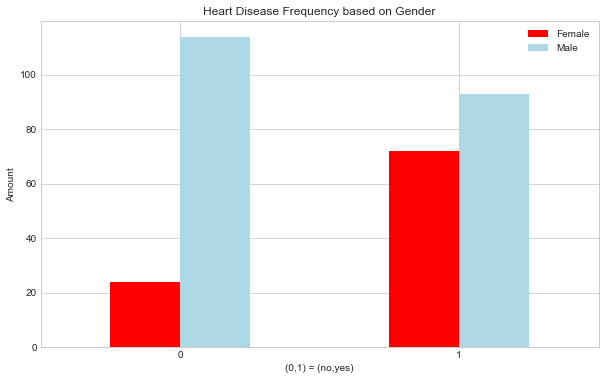

In [13]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color=["red","lightblue"]);
plt.title("Heart Disease Frequency based on Gender")
plt.xlabel("(0,1) = (no,yes)")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [14]:
#thalach:- Max heart rate achived
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

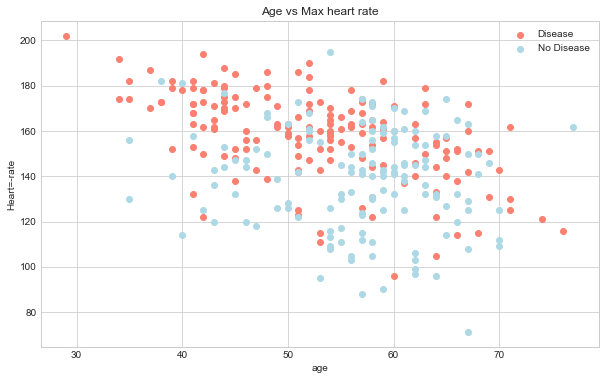

In [15]:
 #Age vs MAx heart rate for Heart disease
plt.figure(figsize=(10,6))

#scatter with +ve example
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = "salmon");
plt.xlabel("age")
plt.ylabel("Heart=-rate")
plt.title("Age vs Max heart rate")

#scatter with -ve example
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")
plt.legend(["Disease","No Disease"])

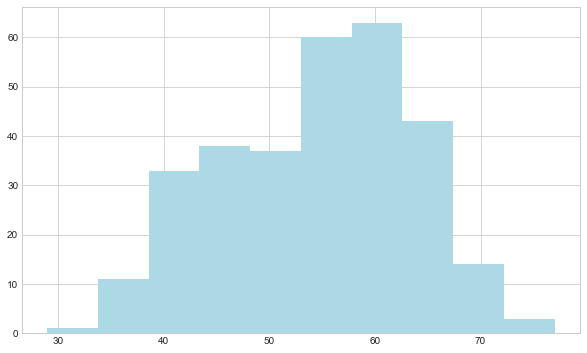

In [16]:
# Spread or distributuion of age
plt.figure(figsize=(10,6))
plt.hist(df.age, color = "lightblue");
# plt.hist(df.age[df.target == 1], color = "salmon");

# plt.hist(df.age[df.target == 0], color = "lightblue");
# plt.legend(["Disease", "No Disease"])

In [17]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
#heart disease freuency per chest pain type
'''cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease'''

pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


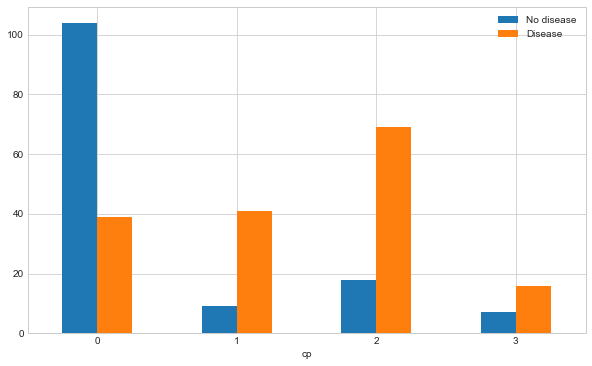

In [19]:
pd.crosstab(df.cp, df.target).plot(figsize=(10,6),
                                   kind="bar")
plt.legend(["No disease","Disease"]);
plt.xticks(rotation=0);

In [20]:
# corelation:- how independent varibles are related to dependent variable
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


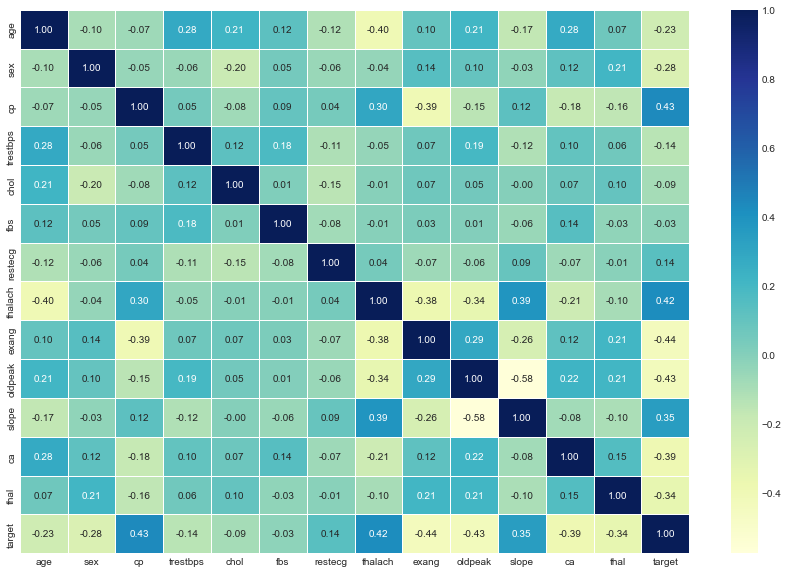

In [21]:
# Visualize correlation
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=.5,fmt=".2f",cmap="YlGnBu")

# cp is linearly related to heart disease (+ve correlation)
# exang is inversly related to heart disease (-ve correlation)


 ### Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# split into X and y
X = df.drop("target", axis = 1)
y = df.target

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

 

Let's try
* Logisitic Regression
* K-Nearest Neighbours classifier
* Random forest classifier

In [24]:
 # Dictonary
model = {"Logistic Regression" : LogisticRegression(),
         "K-Nearest Neighbours": KNeighborsClassifier(),
         "Random foresr classifier":RandomForestClassifier()}

def fit_train_score(model, X_train, X_test, y_train, y_test):
    '''fits and evaluates given ML estimators/models'''
    np.random.seed(42)
    model_score = {}
    
    for name, model in model.items():
        
        model.fit(X_train, y_train) # finds pattern
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [25]:
model_score = fit_train_score(model, X_train, X_test, y_train, y_test)
model_score

C:\Users\revan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.6885245901639344,
 'Random foresr classifier': 0.8360655737704918}

#### Model comparision

In [26]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare

,Logistic Regression,K-Nearest Neighbours,Random foresr classifier
accuracy,0.885246,0.688525,0.836066


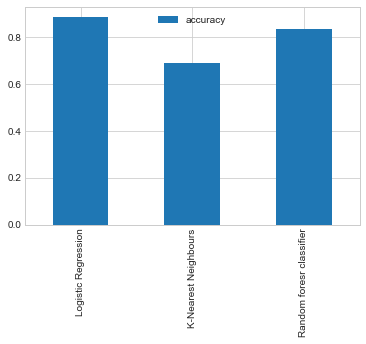

In [27]:
model_compare.T.plot.bar();

### Tuning the model
* Hyper parameter tuning
* Feature importance

**Classification model:**

* Confusion Matrix
* Cross Validation : RandomizedSearchCV, GridSearchCV
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve


### Hyperparmeter tuning

In [28]:
# Lets tune KNN
train_scores = []
test_scores = []

# n_neighbours
neighbours = range(1,21)

#instance
knn = KNeighborsClassifier()

# looping n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test set: 75.41%


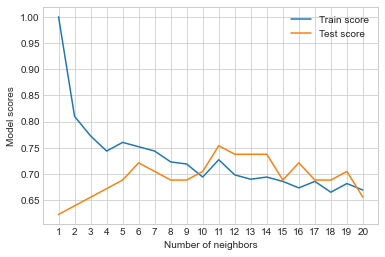

In [31]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend();

print(f"Max KNN score on test set: {max(test_scores)*100:.2f}%")

##### Hyperparameter tuning with RandomizedSearchCV

In [32]:
# LOGESTIC REGRESSION MODEL

# logspace :- Return numbers spaced evenly on a log scale.
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver" :["liblinear"]}

rand_for_grid = {"n_estimators" : np.arange(10,1000,50),
                "max_depth":[None,3,5,10],
                "min_samples_split":np.arange(2,20,2),
                "min_samples_leaf":np.arange(1,20,2)}

In [33]:
#Tuning LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [36]:
# tuning RandomForestClassifier

np.random.seed(42)
rs_rand_for = RandomizedSearchCV(RandomForestClassifier(),
                               rand_for_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_rand_for.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rand_for.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_rand_for.score(X_test,y_test)

0.8688524590163934

In [39]:
model_compare

,Logistic Regression,K-Nearest Neighbours,Random foresr classifier
accuracy,0.885246,0.688525,0.836066


In [40]:
# lets proceed with Logistic Regression
# tuning GridSearchCV using GridSearchCV
 
log_reg_grid = {"C" : np.logspace(-4,4,30),
               "solver" : ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                           log_reg_grid,
                           cv = 5,
                           verbose = True)
    
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

X-axis = model predictions

y-axis = true labels

##### Evaluting our tuned ML model

* Confusion Matrix
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve

In [43]:
# make prediciton
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

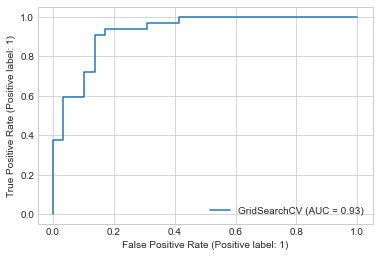

In [44]:
#plot ROC curve and calculate AUC meterics
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);


In [45]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


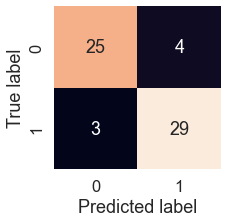

In [46]:
# visualizing using seaborn
sns.set_theme(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''Confusion matrix'''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, #for having number inside the cell
                     cbar = False
                    )
    
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

In [47]:
# classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###### precision:- propotion of +ve identification
i.e,how correctly our model predicts ie., (0,1) 
                                        (true,predicted) 
    no false positive prediciton
    
###### recall:- indicates the propotion of actual which were calorically classified
ie., no false negative (0,1)

#f1 is combination of precision and recall

###### Support is number of samples each metric(precision, accuracy, f1) were built on 

#### Note 
If we have class imbalance we have to pay attention to macro average

* class imbalnce means target (0,1) have way more gap

like (0,1) = 29,32 and are balanced

but if its like (0,1) = 59,32 there is a imbalance

In [48]:
#check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# creating a classifier/model with best parameter
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
 
# cross-validated precission, accuracy, recall and f1 score
def find_grid_score(X, y):
    
    np.random.seed(42)
    grid = {"precision" : "precision",
            "accuracy": 'accuracy',
        'recall':'recall',
        'f1 score': 'f1'}
    
    grid_score={}
    
    for name, i in grid.items():
        grid_score[name] = np.mean(cross_val_score(clf, X, y, cv =5, scoring=i))
        
    return grid_score

metrics_score = find_grid_score(X, y)

In [59]:
metrics_score

{'precision': 0.8207936507936507,
 'accuracy': 0.8446994535519124,
 'recall': 0.9212121212121213,
 'f1 score': 0.8673007976269721}

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(metrics_score, index =['score'] )
cv_metrics


,precision,accuracy,recall,f1 score
score,0.820794,0.844699,0.921212,0.867301


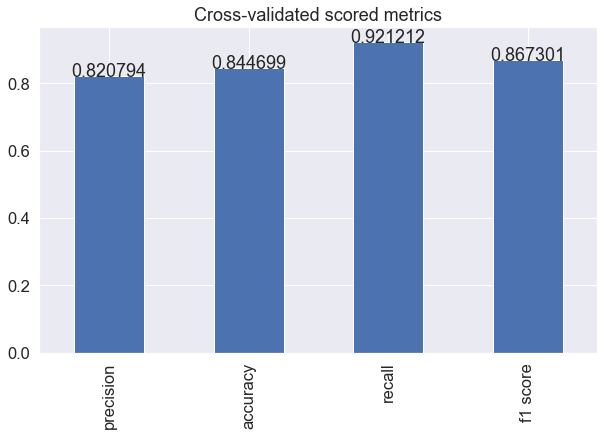

In [87]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
        
        
x = ["precision",'accuracy','recall','f1']
y = [0.820794,0.844699,0.921212,0.867301]

cv_metrics.T.plot(kind = "bar", figsize = (10,6), title = "Cross-validated scored metrics", legend = False);
addlabels(x,y)

In [88]:
# Feature importance : Features that our output depended most

In [89]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
# fit an instance of logistic regressor with best parameters
clf = LogisticRegression(C= 0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);


In [94]:
# check coef_
clf.coef_
# how X_train contribute to target

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [105]:
#match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [106]:
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

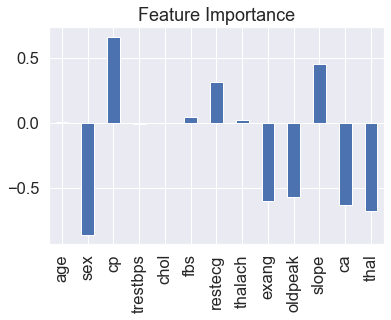

In [115]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance",legend=False);


#### Trying Catboost and XGboost

In [126]:

np.random.seed(42)
from catboost import CatBoostClassifier

# Initialize data
cat_features = [0, 1]

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
# Fit model
model.fit(X_train, y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(X_test, prediction_type='RawFormulaVal')



0:	learn: 0.5357328	total: 3.66ms	remaining: 3.66ms
1:	learn: 0.4091402	total: 7.12ms	remaining: 0us


In [125]:
model.score(X_test, y_test)

0.8360655737704918

In [127]:
from catboost import CatBoostClassifier, Pool

eval_labels = [0, 1, 1, 0]

eval_dataset = Pool(X_test,
                    y_test)

model = CatBoostClassifier(learning_rate=0.03,
                           custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false'])

model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_best_score())


{'learn': {'Logloss': 0.009173427708792802, 'AUC': 1.0}, 'validation': {'Logloss': 0.337544389755332, 'AUC': 0.9310344827586207}}


In [128]:
model.score(X_test, y_test)

0.8524590163934426

In [137]:
import xgboost as xgb

reg = xgb.XGBRegressor(tree_method="gpu_hist", enable_categorical=True, max_cat_to_onehot=5)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train)]);
reg.predict(X_test)
reg.score(X_test, y_test)
 

[0]	validation_0-rmse:0.38405
[1]	validation_0-rmse:0.28997
[2]	validation_0-rmse:0.22489
[3]	validation_0-rmse:0.17839
[4]	validation_0-rmse:0.14578
[5]	validation_0-rmse:0.12209
[6]	validation_0-rmse:0.10493
[7]	validation_0-rmse:0.09155
[8]	validation_0-rmse:0.07908
[9]	validation_0-rmse:0.07129
[10]	validation_0-rmse:0.06523
[11]	validation_0-rmse:0.05618
[12]	validation_0-rmse:0.05280
[13]	validation_0-rmse:0.05002
[14]	validation_0-rmse:0.04553
[15]	validation_0-rmse:0.04049
[16]	validation_0-rmse:0.03603
[17]	validation_0-rmse:0.03203
[18]	validation_0-rmse:0.03064
[19]	validation_0-rmse:0.02731
[20]	validation_0-rmse:0.02498
[21]	validation_0-rmse:0.02405
[22]	validation_0-rmse:0.02318
[23]	validation_0-rmse:0.02279
[24]	validation_0-rmse:0.02214
[25]	validation_0-rmse:0.02161
[26]	validation_0-rmse:0.02006
[27]	validation_0-rmse:0.01755
[28]	validation_0-rmse:0.01591
[29]	validation_0-rmse:0.01424
[30]	validation_0-rmse:0.01320
[31]	validation_0-rmse:0.01286
[32]	validation_0-

0.4543070892910186

### Finally, We manged a Logisitic model to predict the heart-disease of a patient with their Medical report data
* with an accuracy of ~ 88.53%
* with the best parameter {'C': 0.20433597178569418, 'solver': 'liblinear'}


In [ ]:
gs_log_reg